In [1]:
import mlband.mp as MP
from mlband.imports import *
from mlband import plot_formatter
import mlband.data

/Users/ali/mambaforge/envs/cgcnn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from mp_api.client import MPRester

In [61]:
importlib.reload(MP)
importlib.reload(mlband.data)

<module 'mlband.data' from '/Users/ali/GitHub/rewotes/adavaria/mlband/data.py'>

### Getting the list of materials

In [49]:
df, data = mlband.data.get_list_of_materials()

Retrieving SummaryDoc documents: 100%|██████████| 1000/1000 [00:00<00:00, 32263876.92it/s]

Number of missing values:  0


In [50]:
df

,material_id,band_gap
0,mp-757220,5.3849
1,mp-573369,3.7419
2,mp-28967,0.7792
3,mp-559295,2.6721
4,mp-1293179,0.0000
...,...,...
995,mp-1026645,0.0000
996,mp-1017457,0.0000
997,mp-557176,4.5127
998,mp-978262,0.0000


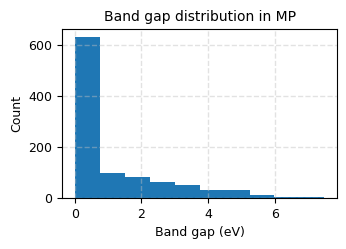

In [51]:
ax = df['band_gap'].hist()
ax.set_xlabel('Band gap (eV)')
ax.set_ylabel('Count')
ax.set_title('Band gap distribution in MP')
pass

In [11]:
data = MP.mpr.materials.summary.search(
    # chemsys="Si-O", 
    fields=['material_id', 'composition', 'band_gap', 'structure'],
    chunk_size=1000,
    num_chunks=1,
)

df = MP.mp_summary_to_df(data)

Retrieving SummaryDoc documents: 100%|██████████| 1000/1000 [00:00<00:00, 35848752.14it/s]


In [85]:
# Checking the missing values
ind = ~(df['band_gap'] >= 0)
print('Number of missing values: ', ind.sum())
# Drop the missing values
df = df.loc[~ind, :]
# Reset the index
df.reset_index(drop=True, inplace=True)

Number of missing values:  0


In [55]:
df.to_pickle('data/mp.pkl')

In [8]:
df

,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,...,weighted_surface_energy_EV_PER_ANG2,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs
0,None,None,None,None,"{'Lu': 2.0, 'H': 12.0, 'Cl': 6.0, 'O': 30.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,"{'Cs': 12.0, 'Nd': 4.0, 'Mo': 12.0, 'O': 48.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,"{'Ba': 2.0, 'Pd': 4.0, 'S': 8.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,"{'Fe': 8.0, 'P': 8.0, 'O': 32.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,"{'Li': 8.0, 'Co': 6.0, 'Ni': 2.0, 'O': 16.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,None,None,None,None,"{'K': 4.0, 'U': 5.0, 'Te': 2.0, 'O': 21.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9996,None,None,None,None,"{'Mg': 1.0, 'V': 4.0, 'Cu': 3.0, 'O': 12.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9997,None,None,None,None,"{'Li': 8.0, 'Fe': 10.0, 'Ni': 4.0, 'O': 24.0}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9998,None,None,None,None,"{'Sr': 2.0, 'Li': 1.0, 'Cu': 1.0, 'Br': 1.0, '...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [65]:
from mlband.cgcnn.cgcnn.data import AtomCustomJSONInitializer, CIFData

In [15]:
j = AtomCustomJSONInitializer(elem_embedding_file='mlband/cgcnn/data/sample-regression/atom_init.json')

In [56]:
df = pd.read_pickle('data/mp.pkl')

In [17]:
j.__dict__.keys()
# j.atom_types
# j._embedding

dict_keys(['atom_types', '_embedding'])

In [30]:
dataset = CIFData('mlband/cgcnn/data/sample-regression')

In [62]:
mlband.data.create_dataset(df=df, path='data/mp')

In [66]:
dataset = CIFData('data/mp')

In [69]:
dataset.__dict__.keys()

dict_keys(['root_dir', 'max_num_nbr', 'radius', 'id_prop_data', 'ari', 'gdf'])